## 10Alytics Capstone Project - Online Payment Fraud Detection Using Machine Learning

### Blosom Bank Online Payment Transactions Analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset
data = pd.read_csv(r"C:\Users\User\Desktop\My Portfolio\Online Payment Fraud Detection.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [3]:
#Summary of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [4]:
#Statistical description of Dataset
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [5]:
#Classification of Dataset features

obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print('Categorical variables:', len(object_cols))

int_ =(data.dtypes == 'int')
num_cols = list(int_[int_].index)
print('integer variables:', len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print('Float variables:', len(fl_cols))

Categorical variables: 3
integer variables: 0
Float variables: 5


### Data Visualisation

<AxesSubplot:xlabel='type', ylabel='count'>

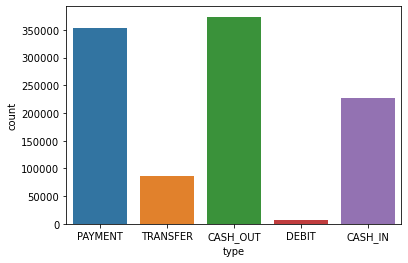

In [6]:
sns.countplot(x='type', data=data)

<AxesSubplot:xlabel='type', ylabel='amount'>

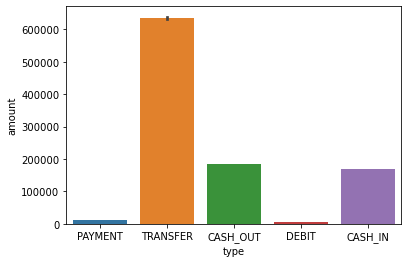

In [7]:
sns.barplot(x='type', y='amount', data = data)

In [8]:
data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

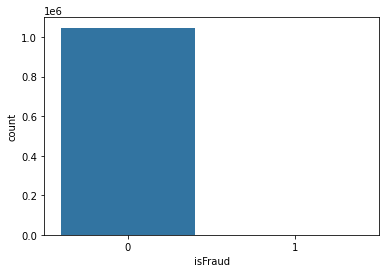

In [9]:
sns.countplot(x='isFraud', data=data)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

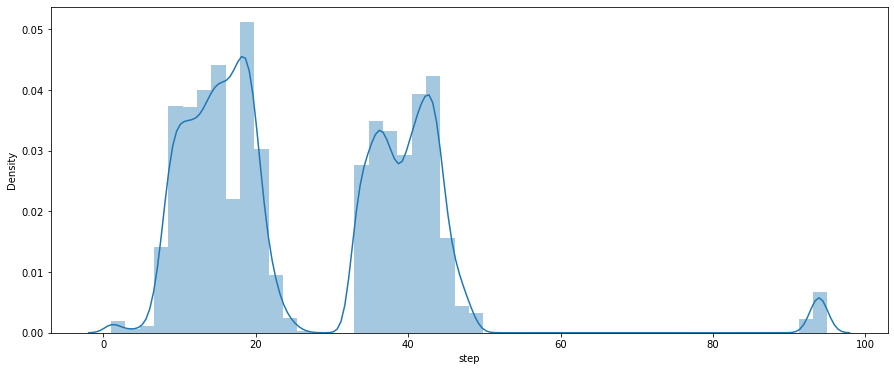

In [10]:
plt.figure(figsize= (15, 6))
sns.distplot(data['step'], bins=50)

<AxesSubplot:>

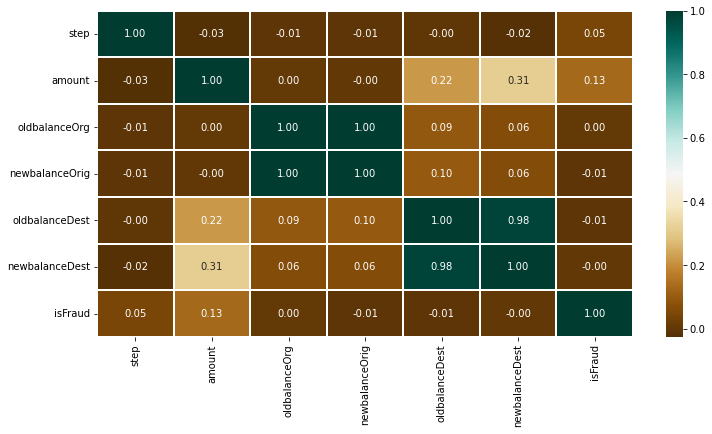

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

### PREPROCESSING

In [12]:
target= data['isFraud']
data= data.drop(columns=['isFraud', 'nameOrig', 'nameDest'], axis =1)

In [13]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [14]:
from sklearn import preprocessing

lee = preprocessing.LabelEncoder()
lee.fit(data['type'])
data['type'] = lee.transform(data['type'])
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.00,160296.36,0.00,0.00
1,1,3,1864.28,21249.00,19384.72,0.00,0.00
2,1,4,181.00,181.00,0.00,0.00,0.00
3,1,1,181.00,181.00,0.00,21182.00,0.00
4,1,3,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
1048570,95,1,132557.35,479803.00,347245.65,484329.37,616886.72
1048571,95,3,9917.36,90545.00,80627.64,0.00,0.00
1048572,95,3,14140.05,20545.00,6404.95,0.00,0.00
1048573,95,3,10020.05,90605.00,80584.95,0.00,0.00


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [17]:
data

array([[-1.6620219 ,  0.9565757 , -0.56173807, ..., -0.24383202,
        -0.42588334, -0.46106169],
       [-1.6620219 ,  0.9565757 , -0.59184049, ..., -0.29067345,
        -0.42588334, -0.46106169],
       [-1.6620219 ,  1.70006662, -0.59819391, ..., -0.29711726,
        -0.42588334, -0.46106169],
       ...,
       [ 4.35465419,  0.9565757 , -0.54550648, ..., -0.29498814,
        -0.42588334, -0.46106169],
       [ 4.35465419,  0.9565757 , -0.56105712, ..., -0.27032945,
        -0.42588334, -0.46106169],
       [ 4.35465419,  0.9565757 , -0.55565977, ..., -0.27413563,
        -0.42588334, -0.46106169]])

In [18]:
data.shape

(1048575, 7)

### Model Training and Testing

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.3,random_state=0)

In [22]:
print(x_train.shape)
print(x_test.shape)

(734002, 7)
(314573, 7)


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf= LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [25]:
prediction = clf.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
score = roc_auc_score(y_test,prediction)

In [28]:
score

0.6486391018054715

In [29]:
accuracy = accuracy_score(y_test, prediction)
print('Accuracy:', accuracy)

Accuracy: 0.9992370610319385


In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [32]:
nb_pred = nb.predict(x_test)
nb_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
score2 = roc_auc_score(y_test,prediction)

In [34]:
score

0.6486391018054715

In [35]:
accuracy = accuracy_score(y_test, nb_pred)
print('Accuracy:', accuracy)

Accuracy: 0.973201768746841


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
score3 = roc_auc_score(y_test,prediction)

In [40]:
score

0.6486391018054715

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9997615815724807


In [42]:
from sklearn.tree import export_graphviz


In [43]:
from sklearn.metrics import plot_confusion_matrix

In [44]:
confusion_matrix(y_test, prediction, labels=(0,1))

array([[314234,      6],
       [   234,     99]], dtype=int64)

In [45]:
conf_matrix =confusion_matrix(y_true=y_test, y_pred=y_pred)

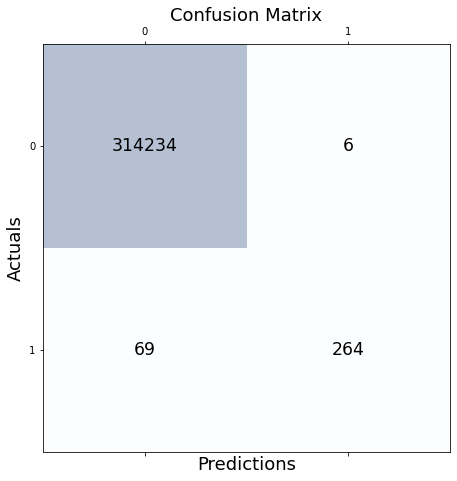

In [46]:
fig, ax= plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i,j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()